# 주어진 시계열 데이터에서 이상치 탐지 및 처리 실습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### 시계열 데이터 생성, 이상치 추가, 데이터 프레임 생성

In [2]:
# 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10

# 이상치 추가
values[15] = 70

# 데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data['Value'].iloc[15])

70.0


In [3]:
# 이상치 탐지
z_scores = np.abs(stats.zscore(data['Value']))

# 임계치 설정
threshold = 3

# z-scores 임계값 초과하는 체크
outliers = z_scores > threshold

# 이상치를 -> 결측치로 처리 
data.loc[outliers, 'Value'] = np.nan

# 결측치 보간 
data['Value'] = data['Value'].interpolate()
print(data['Value'].iloc[15])

-7.706784598720802


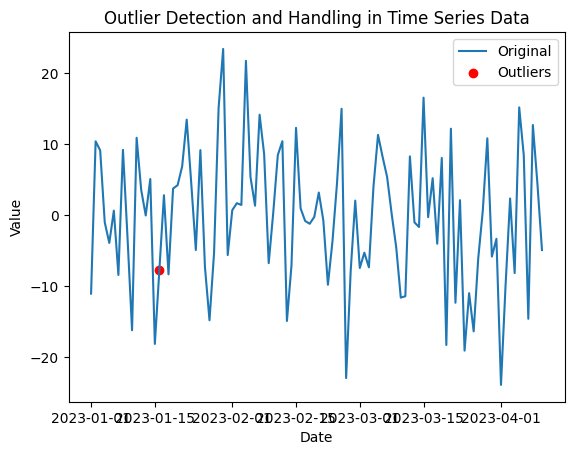

이상치 처리된 데이터 확인 >>  -7.706784598720802


In [4]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection and Handling in Time Series Data')
plt.legend()
plt.show()

 

# 처리된 데이터 확인
print("이상치 처리된 데이터 확인 >> " , data['Value'].iloc[15])